# Predicting Song Genre Through its Valence and Danceability

In [249]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

Links:
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# Part 1: Finding Patterns Within Data 

## About the Data: music_genre.csv

In [250]:
tracks = pd.read_csv("music_genre.csv")
tracks

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


## Missing Analysis
Here are the different genres of music. I'm going to see how many are missing.

In [251]:
tracks[pd.isnull(tracks).any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only 5 rows are missing (out of 50005), so I will just get rid of these rows (instead of imputing them).

In [252]:
tracks = tracks.dropna()
tracks

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


## EDA

There are many cool features in this dataframe! I'm especially interested in the danceability feature -- how did the creator of the dataframe measure danceability for each track? Do more upbeat, happy songs have a higher danceability? If so, does that mean that some genres have a lower danceability than other genres?

In [253]:
dance_valence_genre = tracks[["danceability", "valence", "music_genre"]]
dance_valence_genre #now the table is more concise and readable.

,danceability,valence,music_genre
0,0.652,0.759,Electronic
1,0.622,0.531,Electronic
2,0.620,0.333,Electronic
3,0.774,0.270,Electronic
4,0.638,0.323,Electronic
...,...,...,...
50000,0.913,0.330,Hip-Hop
50001,0.709,0.113,Hip-Hop
50002,0.693,0.395,Hip-Hop
50003,0.782,0.354,Hip-Hop


## EDA -- Visualizations
The dataframe has 50000 rows, which will result in overplotting (when too many points are plotted that it is hard to see the graph). Therefore, I will take just take 500 random rows from the dataframe and plot them.

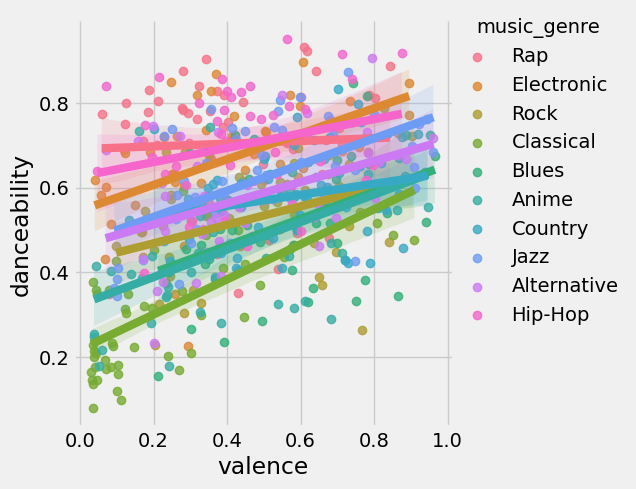

In [254]:
dvg_sampled = dance_valence_genre.sample(n=500)
ax = sns.lmplot(data=dvg_sampled, x="valence", y="danceability", hue="music_genre")
sns.move_legend(ax, "upper right") 

We can tell from this scatterplot that the correlation between valence and danceability does depend on genre. For example, for classical music, the line has a steep slope (many tracks have low valence and low danceability while many tracks also have high valence and high danceability) while for hip-hop the line has a slope of 0 (the danceability is constant for any valence). Note that the visualization is different every time the cell is run (because the 500 row samples are random every time), but the general trends should still hold.

Let's try a different visualization:

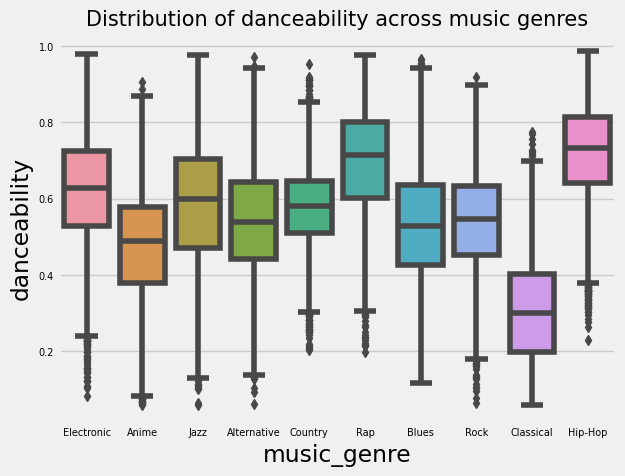

In [255]:
b = sns.boxplot(data=dance_valence_genre, x="music_genre", y="danceability")
b.axes.set_title("Distribution of danceability across music genres",fontsize=15)
b.tick_params(labelsize=7)

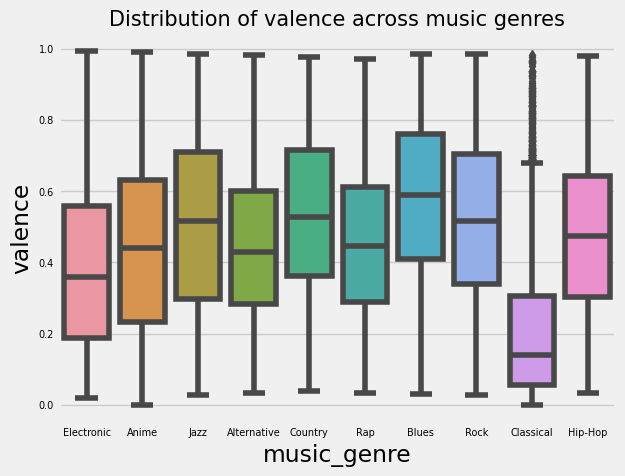

In [256]:
b = sns.boxplot(data=dance_valence_genre, x="music_genre", y="valence")
b.axes.set_title("Distribution of valence across music genres",fontsize=15)
b.tick_params(labelsize=7)

We notice that on average, classical music has a low valence and danceability compared to the other genres, although it has a lot of outliers (especially for the valence boxplot). Another thing to note is that danceability is more dependent on music genre than valence.

# Part 2: Can we predict music genre given valence and danceability?

## Making the Training/Test Model

In [257]:
dance_valence_genre

,danceability,valence,music_genre
0,0.652,0.759,Electronic
1,0.622,0.531,Electronic
2,0.620,0.333,Electronic
3,0.774,0.270,Electronic
4,0.638,0.323,Electronic
...,...,...,...
50000,0.913,0.330,Hip-Hop
50001,0.709,0.113,Hip-Hop
50002,0.693,0.395,Hip-Hop
50003,0.782,0.354,Hip-Hop


The train data will consist of 80% of the dataframe while the test data will consist of 20% of the dataframe. 

In [258]:
#Split the data
X = dance_valence_genre[["danceability", "valence"]].values
y = dance_valence_genre["music_genre"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [259]:
#perform KNN
classifier = KNeighborsClassifier(n_neighbors = 11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [260]:
y_pred = classifier.predict(X_test)
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred)
precision, recall

(array([0.12099125, 0.14520311, 0.17940467, 0.47923588, 0.15898826,
        0.2032032 , 0.23540146, 0.13035714, 0.17814371, 0.08754209]),
 array([0.16468254, 0.16247582, 0.21841332, 0.60418848, 0.17849899,
        0.2011893 , 0.25929648, 0.07411168, 0.11553398, 0.05322416]))

In [261]:
dvg_grouped = dance_valence_genre.groupby("music_genre").mean()
dvg_grouped["precision"] = precision
dvg_grouped["recall"] = recall
dvg_grouped

,danceability,valence,precision,recall
music_genre,,,,
Alternative,0.541124,0.447513,0.120991,0.164683
Anime,0.471002,0.437670,0.145203,0.162476
Blues,0.529243,0.580788,0.179405,0.218413
Classical,0.306560,0.210523,0.479236,0.604188
Country,0.577316,0.536732,0.158988,0.178499
Electronic,0.619220,0.389884,0.203203,0.201189
Hip-Hop,0.717373,0.474927,0.235401,0.259296
Jazz,0.584736,0.509248,0.130357,0.074112
Rap,0.696605,0.454999,0.178144,0.115534


We see that our precision was not so great, all around 10-20% accuracy. Given that accuracy of classical music is significantly higher, one reason the precision is very low might be that all genres have a similar valence and danceability number (from the boxplot, we noticed that the genre doesn't affect those factors too much). Next time, I would like to use other features (not just danceability and valence) to see if any other feature could be used to better predict the genre of a track.

### Thank you for reading!